# Chromatic Blur Limited resolution

Chromatic blur in electron microscopy is the blur and loss of resolution due to the energy spread of the electron beam. This energy spread is worsened by an increase in thickness due to inelastic scattering and thus chromatic blur can be modelled as a function of thickness. 

This equation from [de Jong et al (2009)](https://www.nature.com/articles/s41578-018-0071-2) can model this: 

\\[d = \frac{6 \times10^{12}\alpha C_{c}t}{E^2}\\]

	d - Resolution limit
	α - Objective aperture semi-angle
	CC - Chromatic aberration constant
	t - Thickness

In [34]:
import math
import numpy 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size']=30
matplotlib.rcParams['axes.linewidth'] = 4
matplotlib.rcParams['lines.linewidth'] = 4

In [52]:
alpha = 10 #mrad
Cc = 2 #mm
E = 200 #KeV
t = 1000 #nm

def adjust_units(alpha, Cc, E, t):
    alpha = alpha*1e-3
    Cc = Cc*1e-3
    E = E*1e3
    t = t*1e-9
    #print(alpha, Cc, E, t)
    return alpha, Cc, E, t

#alpha, Cc, E, t = adjust_units(alpha, Cc, E, t)

def calculate_resolution(alpha, Cc, E, t):
    alpha, Cc, E, t =adjust_units(alpha, Cc, E, t)
    d = (6*1e12*alpha*Cc*t)/(E**2)
    d = d*1e9
    return d
#print(d*1e9,'nm')



In [51]:
print(calculate_resolution(10, 2, 200,1000))

3e+21


In [83]:
alpha = 5 #mrad
Cc = 2 #mm
E = 200 #KeV
t = 1000 #nm
d100 = []
d200 = []
d300 = []
for t in range(0, 1600, 1):
    d100.append(calculate_resolution(alpha, Cc, 100, t))
    d200.append(calculate_resolution(alpha, Cc, 200, t))
    d300.append(calculate_resolution(alpha, Cc, 300, t))
    

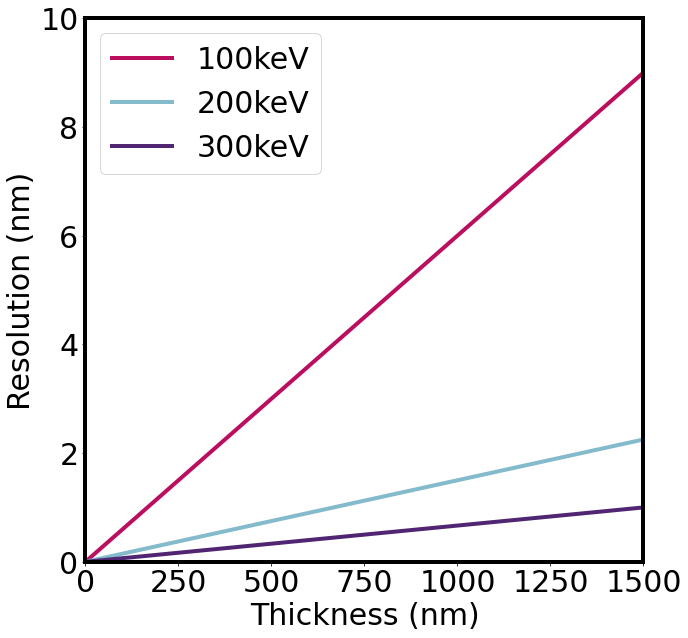

In [84]:
plt.figure(figsize=(10,10))
plt.plot(range(0,1600,1), d100, label='100keV', color='#BB0E5F')
plt.plot(range(0,1600,1), d200, label='200keV', color='#83BACC')
plt.plot(range(0,1600,1), d300, label='300keV', color='#502673' )
plt.ylabel('Resolution (nm)')
plt.xlabel('Thickness (nm)')
plt.ylim(0, 10)
plt.xlim(0, 1500)
plt.legend()
plt.show()